<a href="https://colab.research.google.com/github/brunarigo/DS-project01-datasus-analysis/blob/main/Notebooks/Project01_Datasus_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd

In [150]:
URL1 = 'https://raw.githubusercontent.com/brunarigo/DS-project01-datasus-analysis/main/Data/A170947189_28_143_208_ABCLocInt.csv'
URL2 = 'https://raw.githubusercontent.com/brunarigo/DS-project01-datasus-analysis/main/Data/A171230189_28_143_208_ABCLocRes.csv'

In [151]:
#Importando Local Internação
dados_local_internacao = pd.read_csv(URL1, encoding='ISO-8859-1', sep=";", thousands=".", decimal=",")
dados_local_internacao

,Município,2019/Fev,2019/Mar,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,351380 Diadema,-,-,-,-,-,"73082,85","239080,55","408775,57",629417.24,1375267.27,1570495.95,1542875.88,1386763.10,1682137.18,1878451.44,1815014.97,1834976.08,1592558.79,1580736.25,1675516.76,1655843.60,1546726.06,1414870.04,1069797.10,"449430,36",2.542182e+07
1,352940 Mauá,-,-,-,-,-,-,-,"543,79",298461.27,750717.25,1141079.99,1043326.36,986994.48,948350.46,1198249.67,1359856.37,1212006.66,1241777.45,1261243.21,1513813.72,1270365.08,1147436.34,1135371.21,1004413.59,"359050,66",1.787306e+07
2,354330 Ribeirão Pires,-,-,-,-,-,-,-,"958,66",28837.10,76958.29,81214.02,75340.08,84030.75,81924.52,204943.35,182898.53,173233.49,151949.66,153919.21,159487.91,173234.40,184018.52,215306.03,217136.51,"112182,93",2.357574e+06
3,354780 Santo André,"3330,83","3294,57","3466,49","3628,35","12926,40","40284,33","14329,29","115159,33",626889.33,1813657.86,2904044.52,2579566.57,2716686.93,2802996.49,4310978.08,4117297.68,4314444.24,4037697.65,3682132.31,4009177.05,4421552.55,4818207.31,2210176.85,1053053.71,"624085,28",5.123906e+07
4,354870 São Bernardo do Campo,-,-,-,-,"50095,36","46628,94","11470,95","13818,66",449909.36,2510648.59,3603566.75,3492608.04,3573512.21,4728146.62,5454918.66,5392551.39,5471503.41,5499147.01,6862261.02,6507471.14,7428421.06,9029122.08,9289677.45,8271066.85,"4950623,34",9.263717e+07
5,354880 São Caetano do Sul,-,-,-,-,-,-,-,-,32845.25,264236.35,680211.15,726113.22,736952.05,844254.33,1160011.47,1424338.55,2007979.95,1750310.15,1372036.94,1106565.71,1047260.05,877297.13,1997304.83,986557.91,-,1.701428e+07
6,Total,"3330,83","3294,57","3466,49","3628,35","63021,76","159996,12","264880,79","539256,01",2066359.55,6791485.61,9980612.38,9459830.15,9484939.52,11087809.60,14207552.67,14291957.49,15014143.83,14273440.71,14912328.94,14972032.29,15996676.74,17602807.44,16262706.41,12602025.67,"6495372,57",2.065430e+08


In [152]:
#Importando Local de Residência
dados_local_residencia = pd.read_csv(URL2, encoding='ISO-8859-1', sep=";", thousands=".", decimal=",")
dados_local_residencia

,Município,2019/Mar,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,351380 Diadema,-,-,-,-,"66782,94","145717,45","340377,73",577788.39,1388154.13,1625685.56,1620262.59,1357307.38,1883251.89,2409991.72,2437493.71,2232783.85,1994629.12,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41,845460.97,3.046582e+07
1,352940 Mauá,-,-,-,-,-,"71073,01","75017,10",296275.18,931236.26,1294407.11,1353246.49,1320790.70,1284858.71,1509101.96,2302023.72,2209283.88,1588775.24,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17,529343.37,2.564108e+07
2,354330 Ribeirão Pires,-,-,-,-,-,-,"54683,92",66550.69,242654.05,302321.32,295898.24,280818.83,340946.84,320788.23,350160.63,309085.09,458820.39,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31,209522.10,5.409082e+06
3,354410 Rio Grande da Serra,-,-,-,-,-,-,-,45490.48,120333.08,122621.17,70815.71,88454.02,65124.62,136490.96,177072.90,177360.80,160545.84,227311.99,98170.07,100566.23,183346.75,126089.90,158703.38,42324.35,2.100822e+06
4,354780 Santo André,"3294,57","3466,49","3628,35","12926,40","40284,33","10958,00","199533,26",861694.32,1869242.66,3453461.25,2807859.71,3000264.56,3038084.42,4246626.42,4412251.79,4797647.57,4448518.05,3832744.49,4452298.97,4657632.56,5308546.65,2625892.17,1490003.84,896510.90,5.647337e+07
5,354870 São Bernardo do Campo,-,-,-,"50095,36","47903,81",-,"73693,25",446347.84,2302709.94,3488635.84,3295049.84,3396497.07,4450627.44,5366976.29,5400212.95,5766591.88,5445169.02,6878981.32,5949298.76,6441422.46,7224034.17,7809197.19,6865300.08,4880493.23,8.557924e+07
6,354880 São Caetano do Sul,-,-,-,-,"5025,04","3742,16","4836,51",65307.11,268006.65,759201.31,809228.20,755471.38,859279.39,1097369.26,1401513.51,2019282.99,1734883.49,1478988.31,1152776.87,1008496.26,910254.29,1953033.32,1081890.08,29568.17,1.739815e+07
7,Total,"3294,57","3466,49","3628,35","63021,76","159996,12","231490,62","748141,77",2359454.01,7122336.77,11046333.56,10252360.78,10199603.94,11922173.31,15087344.84,16480729.21,17512036.06,15831341.15,16222863.17,15769282.57,16477067.66,18238948.92,16674850.39,13224575.27,7433223.09,2.230676e+08


In [153]:
colunas_com_valores = dados_local_internacao.mean().index.tolist()
colunas_com_valores.insert(0,"Município")
colunas_com_valores

['Município',
 '2019/Nov',
 '2019/Dez',
 '2020/Jan',
 '2020/Fev',
 '2020/Mar',
 '2020/Abr',
 '2020/Mai',
 '2020/Jun',
 '2020/Jul',
 '2020/Ago',
 '2020/Set',
 '2020/Out',
 '2020/Nov',
 '2020/Dez',
 '2021/Jan',
 '2021/Fev',
 'Total']

In [154]:
dados_local_internacao = dados_local_internacao[colunas_com_valores]

In [155]:
#Inicio tratamento dados Local de Internação: Setando Index, excluindo totais e selecionando ultimos 6 meses
dados_local_internacao = dados_local_internacao.set_index("Município")

In [156]:
dados_local_internacao = dados_local_internacao.drop("Total", axis=1)

In [157]:
dados_local_internacao = dados_local_internacao.T
dados_local_internacao = dados_local_internacao.drop("Total", axis=1)

In [158]:
#Selecionando período interessante para análise - ultimos 6 meses de dados consistentes
periodo_local_internacao = dados_local_internacao.T
periodo_local_internacao = periodo_local_internacao[["2020/Set","2020/Out","2020/Nov","2020/Dez","2021/Jan","2021/Fev"]]
periodo_local_internacao

,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Município,,,,,,
351380 Diadema,1580736.25,1675516.76,1655843.60,1546726.06,1414870.04,1069797.10
352940 Mauá,1261243.21,1513813.72,1270365.08,1147436.34,1135371.21,1004413.59
354330 Ribeirão Pires,153919.21,159487.91,173234.40,184018.52,215306.03,217136.51
354780 Santo André,3682132.31,4009177.05,4421552.55,4818207.31,2210176.85,1053053.71
354870 São Bernardo do Campo,6862261.02,6507471.14,7428421.06,9029122.08,9289677.45,8271066.85
354880 São Caetano do Sul,1372036.94,1106565.71,1047260.05,877297.13,1997304.83,986557.91


In [159]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [160]:
periodo_local_internacao

,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Município,,,,,,
351380 Diadema,1580736.25,1675516.76,1655843.60,1546726.06,1414870.04,1069797.10
352940 Mauá,1261243.21,1513813.72,1270365.08,1147436.34,1135371.21,1004413.59
354330 Ribeirão Pires,153919.21,159487.91,173234.40,184018.52,215306.03,217136.51
354780 Santo André,3682132.31,4009177.05,4421552.55,4818207.31,2210176.85,1053053.71
354870 São Bernardo do Campo,6862261.02,6507471.14,7428421.06,9029122.08,9289677.45,8271066.85
354880 São Caetano do Sul,1372036.94,1106565.71,1047260.05,877297.13,1997304.83,986557.91


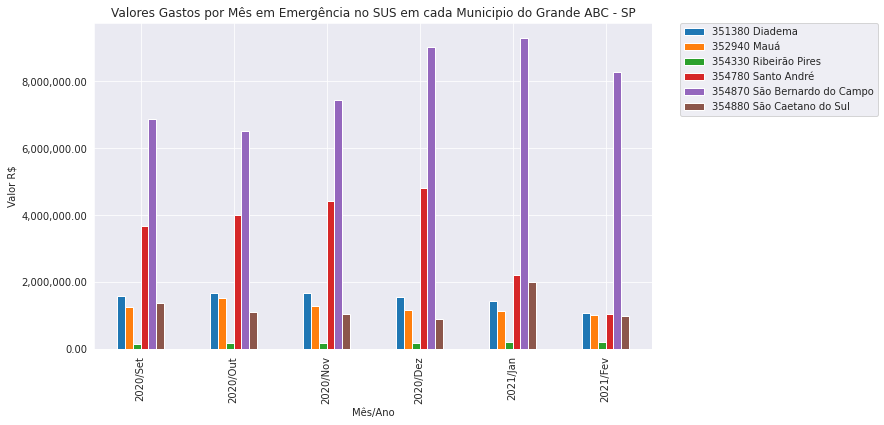

In [161]:
ax = periodo_local_internacao.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Valores Gastos por Mês em Emergência no SUS em cada Municipio do Grande ABC - SP")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [162]:
#Selecionando Municipios de Locais de Internaçao com Menores Gastos
municipios_int_menor_gasto = periodo_local_internacao.loc[["351380 Diadema","352940 Mauá","354330 Ribeirão Pires", "354880 São Caetano do Sul"]]
municipios_int_menor_gasto

,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Município,,,,,,
351380 Diadema,1580736.25,1675516.76,1655843.60,1546726.06,1414870.04,1069797.10
352940 Mauá,1261243.21,1513813.72,1270365.08,1147436.34,1135371.21,1004413.59
354330 Ribeirão Pires,153919.21,159487.91,173234.40,184018.52,215306.03,217136.51
354880 São Caetano do Sul,1372036.94,1106565.71,1047260.05,877297.13,1997304.83,986557.91


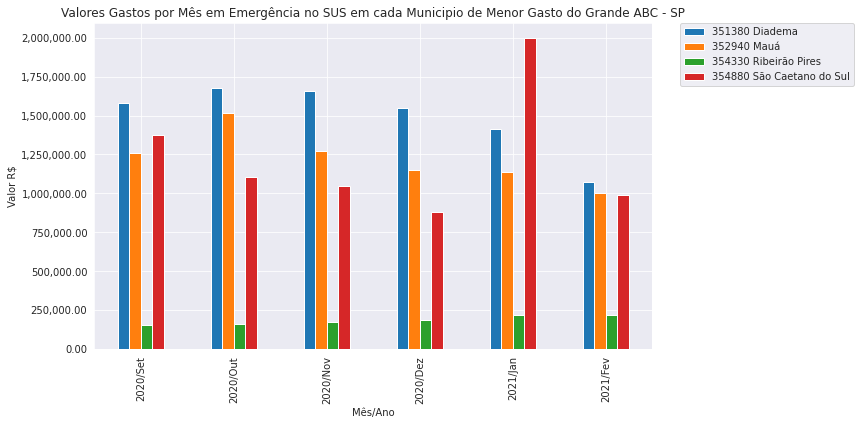

In [163]:
ax = municipios_int_menor_gasto.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Valores Gastos por Mês em Emergência no SUS em cada Municipio de Menor Gasto do Grande ABC - SP")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Enquanto tivemos um aumento considerável nos gastos para os municipios com maior quantidade de habitantes durante o pico de casos da Covid, nos meses de Outubro, Novembro e Dezembro, houve uma queda nos gastos para os municipios de menos habitantes, nos mesmos meses.

In [164]:
#Realizando as mesmas análises, porém agora com os gastos considerando a cidade de residência do paciente e não mais a cidade em que ele foi atendido
dados_local_residencia

,Município,2019/Mar,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,351380 Diadema,-,-,-,-,"66782,94","145717,45","340377,73",577788.39,1388154.13,1625685.56,1620262.59,1357307.38,1883251.89,2409991.72,2437493.71,2232783.85,1994629.12,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41,845460.97,3.046582e+07
1,352940 Mauá,-,-,-,-,-,"71073,01","75017,10",296275.18,931236.26,1294407.11,1353246.49,1320790.70,1284858.71,1509101.96,2302023.72,2209283.88,1588775.24,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17,529343.37,2.564108e+07
2,354330 Ribeirão Pires,-,-,-,-,-,-,"54683,92",66550.69,242654.05,302321.32,295898.24,280818.83,340946.84,320788.23,350160.63,309085.09,458820.39,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31,209522.10,5.409082e+06
3,354410 Rio Grande da Serra,-,-,-,-,-,-,-,45490.48,120333.08,122621.17,70815.71,88454.02,65124.62,136490.96,177072.90,177360.80,160545.84,227311.99,98170.07,100566.23,183346.75,126089.90,158703.38,42324.35,2.100822e+06
4,354780 Santo André,"3294,57","3466,49","3628,35","12926,40","40284,33","10958,00","199533,26",861694.32,1869242.66,3453461.25,2807859.71,3000264.56,3038084.42,4246626.42,4412251.79,4797647.57,4448518.05,3832744.49,4452298.97,4657632.56,5308546.65,2625892.17,1490003.84,896510.90,5.647337e+07
5,354870 São Bernardo do Campo,-,-,-,"50095,36","47903,81",-,"73693,25",446347.84,2302709.94,3488635.84,3295049.84,3396497.07,4450627.44,5366976.29,5400212.95,5766591.88,5445169.02,6878981.32,5949298.76,6441422.46,7224034.17,7809197.19,6865300.08,4880493.23,8.557924e+07
6,354880 São Caetano do Sul,-,-,-,-,"5025,04","3742,16","4836,51",65307.11,268006.65,759201.31,809228.20,755471.38,859279.39,1097369.26,1401513.51,2019282.99,1734883.49,1478988.31,1152776.87,1008496.26,910254.29,1953033.32,1081890.08,29568.17,1.739815e+07
7,Total,"3294,57","3466,49","3628,35","63021,76","159996,12","231490,62","748141,77",2359454.01,7122336.77,11046333.56,10252360.78,10199603.94,11922173.31,15087344.84,16480729.21,17512036.06,15831341.15,16222863.17,15769282.57,16477067.66,18238948.92,16674850.39,13224575.27,7433223.09,2.230676e+08


In [165]:
colunas_com_valores = dados_local_residencia.mean().index.tolist()
colunas_com_valores.insert(0,"Município")
colunas_com_valores

['Município',
 '2019/Nov',
 '2019/Dez',
 '2020/Jan',
 '2020/Fev',
 '2020/Mar',
 '2020/Abr',
 '2020/Mai',
 '2020/Jun',
 '2020/Jul',
 '2020/Ago',
 '2020/Set',
 '2020/Out',
 '2020/Nov',
 '2020/Dez',
 '2021/Jan',
 '2021/Fev',
 '2021/Mar',
 'Total']

In [166]:
dados_local_residencia = dados_local_residencia[colunas_com_valores]

In [167]:
#Inicio tratamento dados Local de Residência: Setando Index, limpando totais e selecionando ultimos 6 meses
dados_local_residencia = dados_local_residencia.set_index("Município")

In [168]:
dados_local_residencia = dados_local_residencia.drop("Total", axis=1)

In [169]:
dados_local_residencia

,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Município,,,,,,,,,,,,,,,,,
351380 Diadema,577788.39,1388154.13,1625685.56,1620262.59,1357307.38,1883251.89,2409991.72,2437493.71,2232783.85,1994629.12,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41,845460.97
352940 Mauá,296275.18,931236.26,1294407.11,1353246.49,1320790.70,1284858.71,1509101.96,2302023.72,2209283.88,1588775.24,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17,529343.37
354330 Ribeirão Pires,66550.69,242654.05,302321.32,295898.24,280818.83,340946.84,320788.23,350160.63,309085.09,458820.39,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31,209522.10
354410 Rio Grande da Serra,45490.48,120333.08,122621.17,70815.71,88454.02,65124.62,136490.96,177072.90,177360.80,160545.84,227311.99,98170.07,100566.23,183346.75,126089.90,158703.38,42324.35
354780 Santo André,861694.32,1869242.66,3453461.25,2807859.71,3000264.56,3038084.42,4246626.42,4412251.79,4797647.57,4448518.05,3832744.49,4452298.97,4657632.56,5308546.65,2625892.17,1490003.84,896510.90
354870 São Bernardo do Campo,446347.84,2302709.94,3488635.84,3295049.84,3396497.07,4450627.44,5366976.29,5400212.95,5766591.88,5445169.02,6878981.32,5949298.76,6441422.46,7224034.17,7809197.19,6865300.08,4880493.23
354880 São Caetano do Sul,65307.11,268006.65,759201.31,809228.20,755471.38,859279.39,1097369.26,1401513.51,2019282.99,1734883.49,1478988.31,1152776.87,1008496.26,910254.29,1953033.32,1081890.08,29568.17
Total,2359454.01,7122336.77,11046333.56,10252360.78,10199603.94,11922173.31,15087344.84,16480729.21,17512036.06,15831341.15,16222863.17,15769282.57,16477067.66,18238948.92,16674850.39,13224575.27,7433223.09


In [170]:
#Excluindo dados referente ao Munícipio de Rio Grande da Serra. Não existem dados computados desse municipio para a primeira situação (Local de Internação)
#então ele será desconsiderado da análise
dados_local_residencia = dados_local_residencia.T
dados_local_residencia = dados_local_residencia.drop("354410 Rio Grande da Serra", axis=1)

In [171]:
dados_local_residencia = dados_local_residencia.drop("Total", axis=1)

In [172]:
#Selecionando período interessante para análise - ultimos 6 meses de dados consistentes
periodo_local_residencia = dados_local_residencia.T
periodo_local_residencia = periodo_local_residencia[["2020/Set","2020/Out","2020/Nov","2020/Dez","2021/Jan","2021/Fev"]]
periodo_local_residencia

,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Município,,,,,,
351380 Diadema,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41
352940 Mauá,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17
354330 Ribeirão Pires,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31
354780 Santo André,3832744.49,4452298.97,4657632.56,5308546.65,2625892.17,1490003.84
354870 São Bernardo do Campo,6878981.32,5949298.76,6441422.46,7224034.17,7809197.19,6865300.08
354880 São Caetano do Sul,1478988.31,1152776.87,1008496.26,910254.29,1953033.32,1081890.08


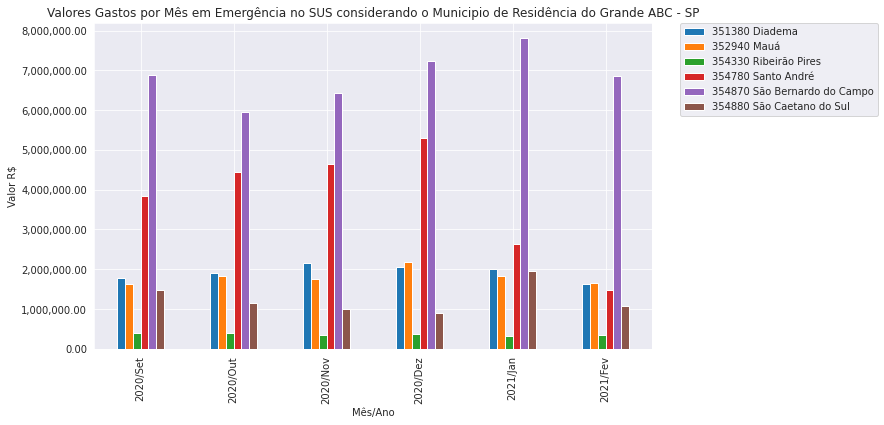

In [173]:
ax = periodo_local_residencia.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Valores Gastos por Mês em Emergência no SUS considerando o Municipio de Residência do Grande ABC - SP")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [174]:
#Selecionando Municipios de Locais de Residência com Menores Gastos (Abaixo R$2,5 milhões)
municipios_res_menor_gasto = periodo_local_residencia.loc[["351380 Diadema","352940 Mauá","354330 Ribeirão Pires", "354880 São Caetano do Sul"]]
municipios_res_menor_gasto

,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Município,,,,,,
351380 Diadema,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41
352940 Mauá,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17
354330 Ribeirão Pires,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31
354880 São Caetano do Sul,1478988.31,1152776.87,1008496.26,910254.29,1953033.32,1081890.08


O IBGE (Instituto Brasileiro de Geografia e Estatística) divulgou em 27/08/2020 as estimativas das populações residentes nos 5.570 municípios brasileiros, com referência em 1º de julho de 2020. 
Nessa data, a população do Brasil chegou a 211,8 milhões de habitantes e a soma das sete cidades do Grande ABC a 2.807.712, sendo:
- São Bernardo do Campo: 844.483
- Sando André: 721.368
- Mauá: 477.552 
- Diadema: 426.757 
- São Caetano 161.957 
- Ribeirão Pires: 124.159 
- Rio Grande da Serra: 51.436 

*Fonte: https://www.dgabc.com.br/Noticia/3532606/grande-abc-tem-2-8-milhoes-de-habitantes-segundo-ibge*


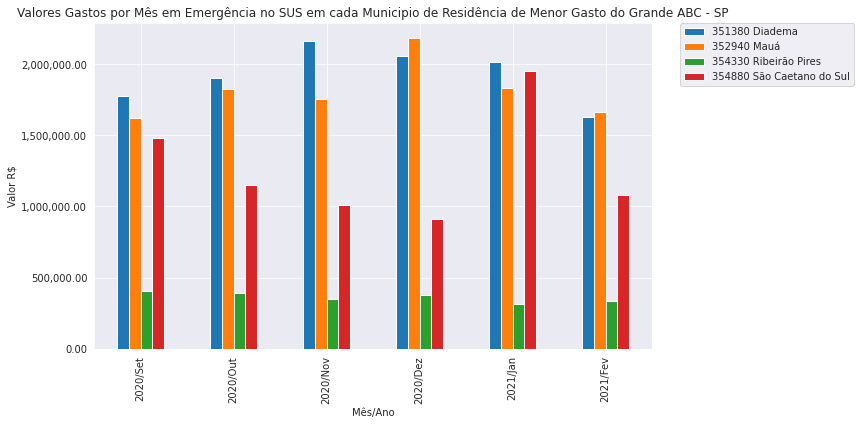

In [175]:
ax = municipios_res_menor_gasto.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Valores Gastos por Mês em Emergência no SUS em cada Municipio de Residência de Menor Gasto do Grande ABC - SP")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()